<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-08-25 16:27:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  9.45MB/s    in 31s     

2025-08-25 16:28:28 (4.84 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


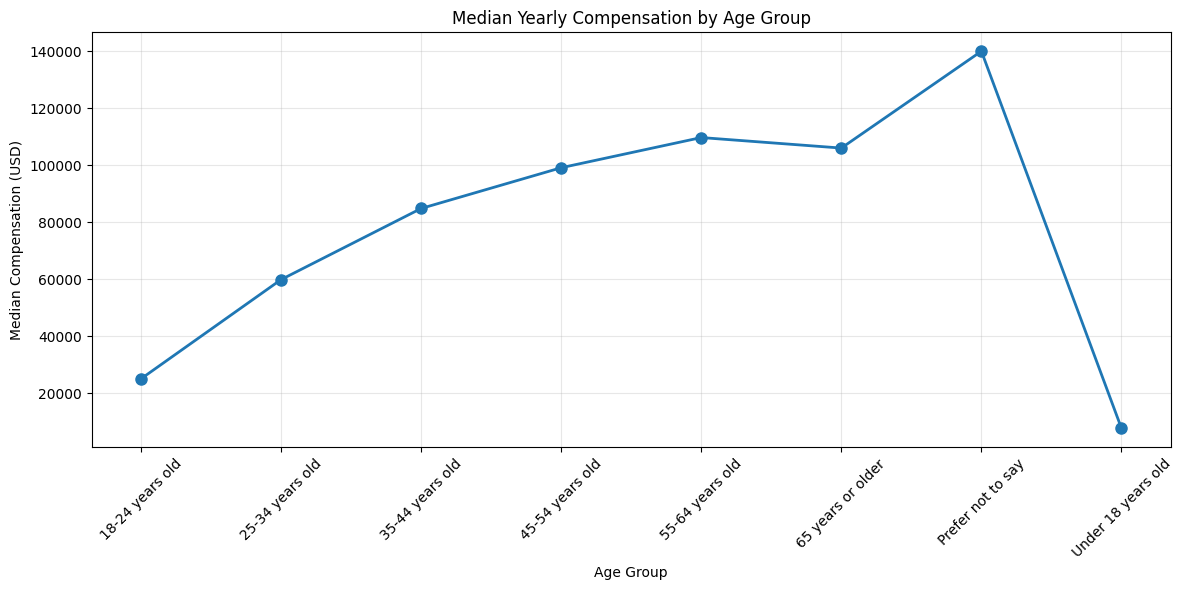

Median Compensation by Age Group:
Age
18-24 years old        25000.0
25-34 years old        59825.0
35-44 years old        84796.0
45-54 years old        99099.0
55-64 years old       109691.0
65 years or older     106000.0
Prefer not to say     140000.0
Under 18 years old      7626.5
Name: ConvertedCompYearly, dtype: float64


In [12]:
if 'ConvertedCompYearly' in df.columns and 'Age' in df.columns:
    # Clean the data
    comp_age_data = df[['Age', 'ConvertedCompYearly']].dropna()
    comp_age_data = comp_age_data[comp_age_data['ConvertedCompYearly'] > 0]

    # Group by age and calculate median compensation
    age_comp_median = comp_age_data.groupby('Age')['ConvertedCompYearly'].median()

    # Create line chart
    plt.figure(figsize=(12, 6))
    age_comp_median.plot(kind='line', marker='o', linewidth=2, markersize=8)
    plt.title('Median Yearly Compensation by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Median Compensation (USD)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("Median Compensation by Age Group:")
    print(age_comp_median)

else:
    print("Required columns not found. Using alternative columns...")
    # Try to find alternative columns
    if len(comp_columns) > 0 and len(age_columns) > 0:
        comp_col = comp_columns[0]
        age_col = age_columns[0]
        comp_age_data = df[[age_col, comp_col]].dropna()
        comp_age_data = comp_age_data[comp_age_data[comp_col] > 0]
        age_comp_median = comp_age_data.groupby(age_col)[comp_col].median()

        plt.figure(figsize=(12, 6))
        age_comp_median.plot(kind='line', marker='o', linewidth=2, markersize=8)
        plt.title(f'Median {comp_col} by {age_col}')
        plt.xlabel(age_col)
        plt.ylabel(f'Median {comp_col} (USD)')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


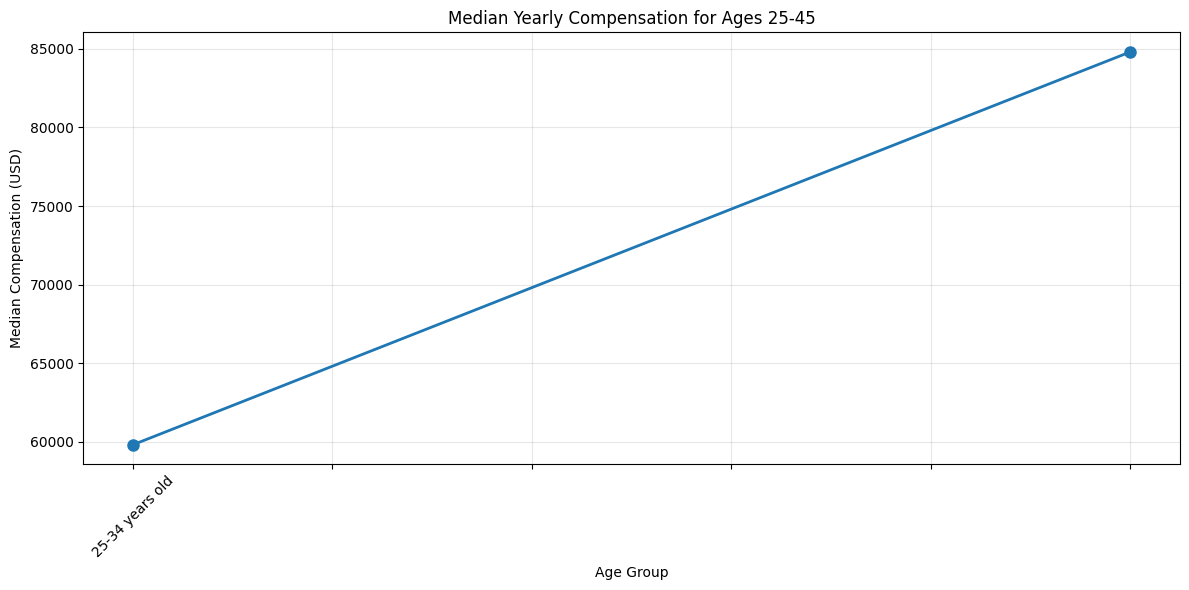

Median Compensation for Ages 25-45:
Age
25-34 years old    59825.0
35-44 years old    84796.0
Name: ConvertedCompYearly, dtype: float64


In [17]:
if 'ConvertedCompYearly' in df.columns and 'Age' in df.columns:
    # Clean the data and filter for ages 25-45
    filtered_data = df[['Age', 'ConvertedCompYearly']].dropna()
    filtered_data = filtered_data[filtered_data['ConvertedCompYearly'] > 0]
    filtered_data = filtered_data[filtered_data['Age'].isin(['25-34 years old', '35-44 years old'])]

    # Group by age and calculate median compensation
    age_comp_median = filtered_data.groupby('Age')['ConvertedCompYearly'].median()

    # Create line chart
    plt.figure(figsize=(12, 6))
    age_comp_median.plot(kind='line', marker='o', linewidth=2, markersize=8)
    plt.title('Median Yearly Compensation for Ages 25-45')
    plt.xlabel('Age Group')
    plt.ylabel('Median Compensation (USD)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("Median Compensation for Ages 25-45:")
    print(age_comp_median)

else:
    print("Required columns not found.")

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


In [9]:
if len(job_sat_columns) > 0 and len(exp_columns) > 0:
    job_sat_col = job_sat_columns[0]
    exp_col = exp_columns[0]

    # Clean the data
    sat_exp_data = df[[exp_col, job_sat_col]].dropna()

    # Convert experience to numeric if needed
    if sat_exp_data[exp_col].dtype == 'object':
        sat_exp_data[exp_col] = pd.to_numeric(sat_exp_data[exp_col], errors='coerce')
        sat_exp_data = sat_exp_data.dropna()

    # Create experience bins
    sat_exp_data['Experience_Level'] = pd.cut(sat_exp_data[exp_col],
                                             bins=5,
                                             labels=['Beginner', 'Junior', 'Mid-Level', 'Senior', 'Expert'])

    # Group by experience level and calculate median satisfaction
    exp_sat_median = sat_exp_data.groupby('Experience_Level')[job_sat_col].median()

    # Create line chart
    plt.figure(figsize=(12, 6))
    exp_sat_median.plot(kind='line', marker='o', linewidth=2, markersize=8, color='purple')
    plt.title('Median Job Satisfaction by Experience Level')
    plt.xlabel('Experience Level')
    plt.ylabel('Median Job Satisfaction Score')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("Median Job Satisfaction by Experience Level:")
    print(exp_sat_median)

else:
    print("Required columns not found")

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


/tmp/ipython-input-2424235262.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_comp_median = comp_exp_data.groupby('Experience_Level')['ConvertedCompYearly'].median()


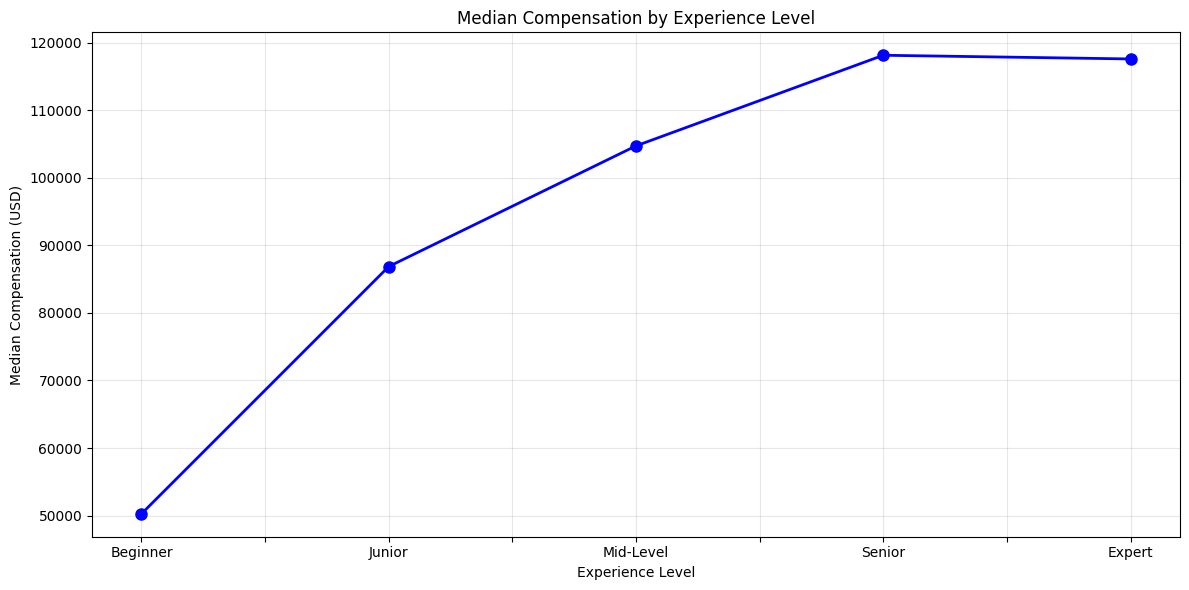

Median Compensation by Experience Level:
Experience_Level
Beginner      50266.0
Junior        86870.0
Mid-Level    104732.0
Senior       118147.0
Expert       117601.0
Name: ConvertedCompYearly, dtype: float64


In [20]:
# Find a column related to experience
exp_columns = [col for col in df.columns if 'exp' in col.lower()]

if 'ConvertedCompYearly' in df.columns and len(exp_columns) > 0:
    exp_col = exp_columns[0]

    # Clean the data
    comp_exp_data = df[[exp_col, 'ConvertedCompYearly']].dropna()
    comp_exp_data = comp_exp_data[comp_exp_data['ConvertedCompYearly'] > 0]

    # Convert experience to numeric if needed
    if comp_exp_data[exp_col].dtype == 'object':
        comp_exp_data[exp_col] = pd.to_numeric(comp_exp_data[exp_col], errors='coerce')
        comp_exp_data = comp_exp_data.dropna()

    # Create experience bins
    comp_exp_data['Experience_Level'] = pd.cut(comp_exp_data[exp_col],
                                              bins=5,
                                              labels=['Beginner', 'Junior', 'Mid-Level', 'Senior', 'Expert'])

    # Group by experience level and calculate median compensation
    exp_comp_median = comp_exp_data.groupby('Experience_Level')['ConvertedCompYearly'].median()

    # Create line chart
    plt.figure(figsize=(12, 6))
    exp_comp_median.plot(kind='line', marker='o', linewidth=2, markersize=8, color='blue')
    plt.title('Median Compensation by Experience Level')
    plt.xlabel('Experience Level')
    plt.ylabel('Median Compensation (USD)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("Median Compensation by Experience Level:")
    print(exp_comp_median)

else:
    print("Required columns not found")

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


/tmp/ipython-input-4130974830.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_sat_median = sat_exp_data.groupby('Experience_Range')[job_sat_col].median()


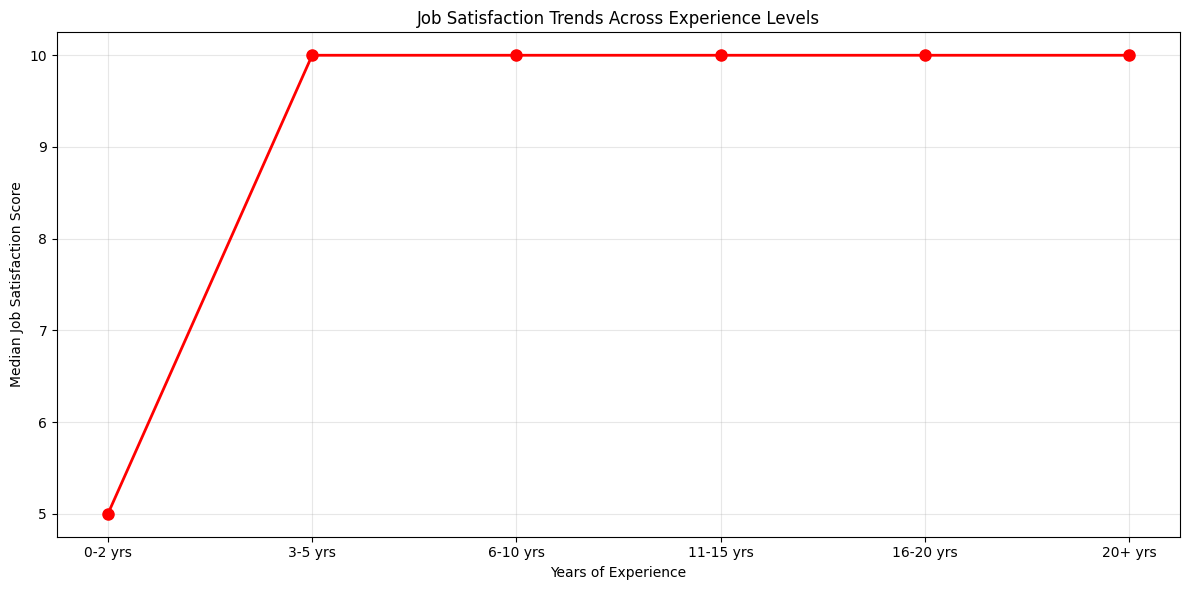

Job Satisfaction by Experience Range:
Experience_Range
0-2 yrs       5.0
3-5 yrs      10.0
6-10 yrs     10.0
11-15 yrs    10.0
16-20 yrs    10.0
20+ yrs      10.0
Name: JobSatPoints_1, dtype: float64


In [22]:
# Find columns related to job satisfaction and experience
job_sat_columns = [col for col in df.columns if 'jobsat' in col.lower()]
exp_columns = [col for col in df.columns if 'exp' in col.lower()]

if len(job_sat_columns) > 0 and len(exp_columns) > 0:
    job_sat_col = job_sat_columns[0]
    exp_col = exp_columns[0]

    # Clean the data
    sat_exp_data = df[[exp_col, job_sat_col]].dropna()

    # Convert experience to numeric if needed
    if sat_exp_data[exp_col].dtype == 'object':
        sat_exp_data[exp_col] = pd.to_numeric(sat_exp_data[exp_col], errors='coerce')
        sat_exp_data = sat_exp_data.dropna()

    # Create experience bins with more granularity
    experience_bins = [0, 2, 5, 10, 15, 20, 50]
    experience_labels = ['0-2 yrs', '3-5 yrs', '6-10 yrs', '11-15 yrs', '16-20 yrs', '20+ yrs']

    sat_exp_data['Experience_Range'] = pd.cut(sat_exp_data[exp_col],
                                             bins=experience_bins,
                                             labels=experience_labels)

    # Group by experience range and calculate median satisfaction
    exp_sat_median = sat_exp_data.groupby('Experience_Range')[job_sat_col].median()

    # Create line chart
    plt.figure(figsize=(12, 6))
    exp_sat_median.plot(kind='line', marker='o', linewidth=2, markersize=8, color='red')
    plt.title('Job Satisfaction Trends Across Experience Levels')
    plt.xlabel('Years of Experience')
    plt.ylabel('Median Job Satisfaction Score')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("Job Satisfaction by Experience Range:")
    print(exp_sat_median)

else:
    print("Required columns not found")

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
